# QC-LDPC parameters estimation

Following notebook shows dependency between QC-LDPC code parameters and error correction availability

In [1]:
import sys
sys.path.insert(0, '../../src')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time


from QC_LDPC import QC_LDPC

## QC-LDPC row weight

In [ ]:
n = 302
p = 151
W = [i for i in range(5, 43, 2)]

T = []
E = []

for w in W:
    qc_ldpc = QC_LDPC.from_params(n, p, w)

    start = time.time()
    e = qc_ldpc.guess_code_max_error(confidence=0.97)
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)
    
    print("w: {}   e: {}".format(w, e))

In [4]:
print(T)
print(E)

[12.872812032699585, 12.08922028541565, 16.177983283996582, 14.487473964691162, 31.929633378982544, 24.565584182739258, 28.72776484489441, 30.024149894714355, 29.08446502685547, 34.33167600631714, 30.76048707962036, 21.284684419631958, 23.87386989593506, 19.308693408966064, 31.351834058761597, 20.24095344543457, 28.511617183685303, 34.96403503417969, 15.817908525466919]
[3, 3, 4, 3, 8, 6, 7, 7, 6, 6, 6, 5, 5, 4, 5, 4, 4, 4, 3]


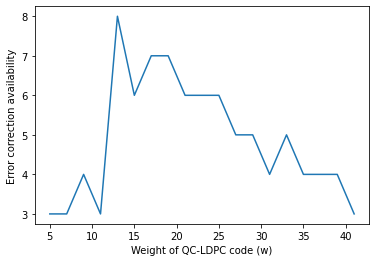

In [6]:
W = [i for i in range(5, 43, 2)]
E = [3, 3, 4, 3, 8, 6, 7, 7, 6, 6, 6, 5, 5, 4, 5, 4, 4, 4, 3]

plt.xlabel('Weight of QC-LDPC code (w)')
plt.ylabel('Error correction availability')
plt.plot(W, E)

In [ ]:
n = 302
p = 151
W = [i for i in range(10, 23, 1)]

T = []
E = []

for w in W:
    qc_ldpc = QC_LDPC.from_params(n, p, w)

    start = time.time()
    e = qc_ldpc.guess_code_max_error(confidence=0.97)
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)
    
    print("w: {}   e: {}".format(w, e))

In [8]:
print(T)
print(E)

[20.42251205444336, 30.897151708602905, 22.522048473358154, 16.68221688270569, 31.58286166191101, 28.020108461380005, 25.188441514968872, 32.86899185180664, 27.73720955848694, 27.879844903945923, 21.29520535469055, 25.73490333557129, 27.947680234909058]
[5, 8, 6, 4, 8, 7, 6, 8, 7, 7, 5, 6, 6]


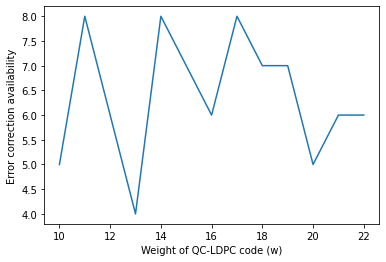

In [69]:
E = [5, 8, 6, 4, 8, 7, 6, 8, 7, 7, 5, 6, 6]
W = [i for i in range(10, 23, 1)]

plt.xlabel('Weight of QC-LDPC code (w)')
plt.ylabel('Error correction availability')
plt.plot(W, E)

## Errors distribution

In [ ]:
n = 302
p = 151
w = 13

T = []
E = []

for i in range(100):   
    qc_ldpc = QC_LDPC.from_params(n, p, w)
    
    start = time.time()
    e = qc_ldpc.guess_code_max_error(confidence=0.97)
    end = time.time()
    
    t = end - start
    
    T.append(t)
    E.append(e)
    
    print("{}: {}".format(i, e))

In [11]:
print(T)
print(E)

[15.188774585723877, 27.211790084838867, 30.461393356323242, 21.640134811401367, 29.299744367599487, 29.88366150856018, 30.588545083999634, 9.508287191390991, 28.524561405181885, 14.983194589614868, 31.882192373275757, 6.998026609420776, 12.555508613586426, 29.59014320373535, 15.343088388442993, 30.79150128364563, 28.842662811279297, 18.563563585281372, 30.353830099105835, 25.35910177230835, 33.473015546798706, 27.52814292907715, 30.86549425125122, 19.061603546142578, 30.10626769065857, 28.386346578598022, 21.1186842918396, 34.13604950904846, 26.012789487838745, 30.313536167144775, 29.100103855133057, 29.002243518829346, 26.023929357528687, 22.048877000808716, 34.56352090835571, 34.59043741226196, 28.59613037109375, 21.72168803215027, 29.953859090805054, 28.79984760284424, 21.390044927597046, 31.67177677154541, 30.07129979133606, 17.5326509475708, 21.24363660812378, 30.39729118347168, 25.590721130371094, 6.574362516403198, 22.787951707839966, 34.73232293128967, 29.21688723564148, 29.29

Mean is 6.65
E is 6.65
STD is 1.8940696924875813


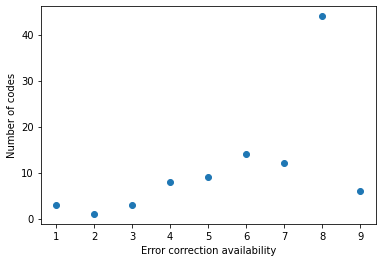

In [75]:
E = [4, 7, 8, 6, 8, 8, 8, 2, 8, 4, 8, 1, 3, 8, 4, 8, 8, 5, 8, 7, 8, 7, 8, 5, 8, 8, 6, 9, 6, 8, 8, 8, 7, 6, 9, 9, 8, 5, 8, 8, 6, 8, 8, 5, 6, 8, 7, 1, 6, 9, 8, 8, 8, 8, 6, 8, 6, 8, 7, 1, 8, 7, 8, 7, 5, 3, 9, 8, 7, 6, 8, 5, 7, 4, 4, 8, 8, 3, 5, 4, 6, 6, 6, 4, 8, 7, 9, 8, 8, 8, 4, 8, 8, 6, 8, 5, 7, 8, 8, 5]

from collections import Counter

c = Counter(E)

items = list(c.items())
data = np.array(items, dtype=int).T

print("Mean is", np.mean(E))
print("E is", np.average(E))
print("STD is", np.std(E))

plt.xlabel('Error correction availability')
plt.ylabel('Number of codes')
plt.scatter(*data)